# DTWを用いた変化点検知

In [1]:
from dtw import dtw
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=False)


import torchvision.transforms as transforms
from torchvision.utils import save_image

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.autograd import Variable

In [2]:
import os
path = os.getcwd()
path=path[:path.find('estimate-innovation')+19]
import sys
sys.path.append(path+"/")
import tsModel

### まずはサンプルコードを試す

[時系列データのあれこれ備忘録 / Dynamic Time Warpingの復習](http://shimpeimiura.tokyo/2019/05/12/%E6%99%82%E7%B3%BB%E5%88%97%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E3%81%82%E3%82%8C%E3%81%93%E3%82%8C%E5%82%99%E5%BF%98%E9%8C%B2-dtw%E3%82%92%E5%BE%A9%E7%BF%92%E3%81%99%E3%82%8B/)のサンプルコード

In [3]:
#サンプルとして適当に2つの系列を用意する
x = np.array([2, 0, 1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)
y = np.array([1, 1, 2, 4, 2, 1, 2, 0]).reshape(-1, 1)

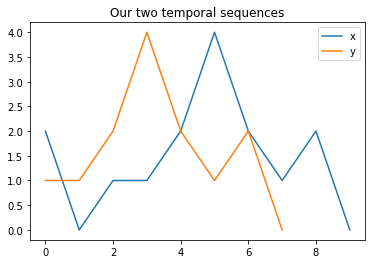

In [4]:
#こんな系列
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.title('Our two temporal sequences')
plt.legend()

Lwノルムをcostとして使う

In [5]:
from dtw import dtw #事前にpip install

l2_norm = lambda x, y: (x - y) ** 2

dist, cost_matrix, acc_cost_matrix, _ = dtw(x, y, dist=l2_norm)

dist

2.0

距離はこんな感じで出るんだそうだ

### 自分のデータでもやってみる

正規乱数


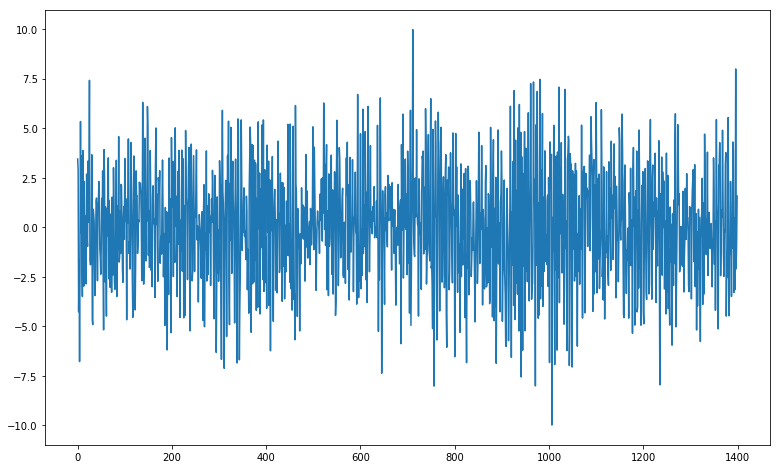

In [6]:
# 人工データの作成
seed=1
Data = tsModel.SARIMA(a=[0.3,-0.4,0.2,-0.5,0.6,-0.1,0.1], N=1400, random_seed=seed, sigma=2)
# Data = torch.tensor(Data, dtype=torch.float)
# Data = torch.tensor(Data)
plt.figure(figsize=(13,8))
plt.plot(Data)
plt.savefig(path+"/images/AR7モデルの人工データその{0}.png".format(seed))

In [7]:
original_window=50
target_window=50
original = Data[:original_window]
dists0 = []

for i in range(original_window, len(Data)-target_window):
    target = Data[i:i+target_window]
    dist, cost_matrix, acc_cost_matrix, _ = dtw(original, target, dist=l2_norm)
    dists0.append(dist)

### 変化点のあるデータでやってみる

正規分布＆一様分布


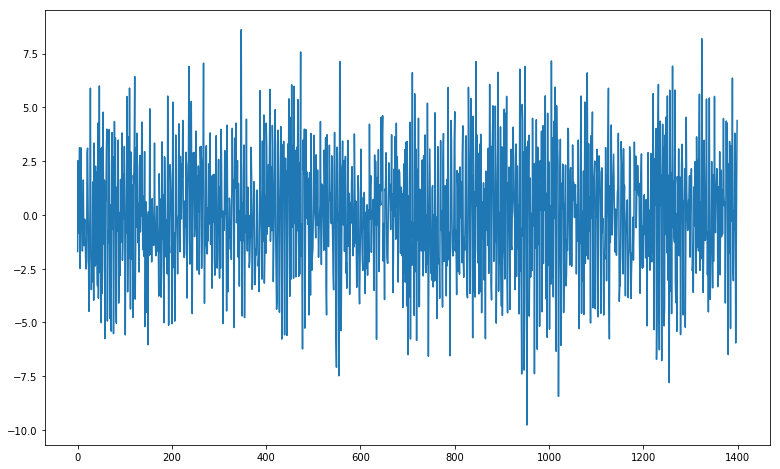

In [8]:
# 人工データの作成
seed=0
Data = tsModel.SARIMA(a=[0.3,-0.4,0.2,-0.5,0.6,-0.1,0.1], N=1400, random_seed=seed, sigma=2, randomness="normal&uniform")
# Data = torch.tensor(Data, dtype=torch.float)
# Data = torch.tensor(Data)
plt.figure(figsize=(13,8))
plt.plot(Data)
plt.savefig(path+"/images/正規分布&一様分布でAR7モデルの人工データその{0}.png".format(seed))

In [9]:
original_window=50
target_window=50
original = Data[:original_window]
dists1 = []

for i in range(original_window, len(Data)-target_window):
    target = Data[i:i+target_window]
    dist, cost_matrix, acc_cost_matrix, _ = dtw(original, target, dist=l2_norm)
    dists1.append(dist)

正規分布＆移動ガンマ分布


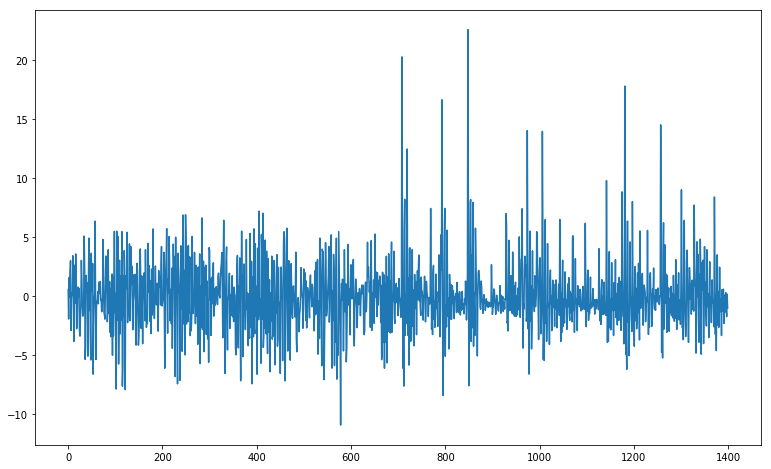

In [37]:
# 人工データの作成
seed=3
Data = tsModel.SARIMA(a=[0.3,-0.4,0.2,-0.5,0.6,-0.1,0.1], N=1400, random_seed=seed, sigma=2, randomness="normal&gamma")
# Data = torch.tensor(Data, dtype=torch.float)
# Data = torch.tensor(Data)
plt.figure(figsize=(13,8))
plt.plot(Data)
plt.savefig(path+"/images/正規分布&移動ガンマ分布でAR7モデルの人工データその{0}.png".format(seed))

In [38]:
original_window=50
target_window=50
original = Data[:original_window]
dists2 = []

for i in range(original_window, len(Data)-target_window):
    target = Data[i:i+target_window]
    dist, cost_matrix, acc_cost_matrix, _ = dtw(original, target, dist=l2_norm)
    dists2.append(dist)

### グラフ

In [40]:
fig = plotly.graph_objs.Figure(
    data=[plotly.graph_objs.Scatter(x=list(range(original_window, len(Data)-target_window)), y=dists0, name="変化点なし", yaxis='y'),
#           plotly.graph_objs.Scatter(x=list(range(original_window, len(Data)-target_window)), y=dists1, name="線形 正規分布から一様分布", yaxis='y'),
          plotly.graph_objs.Scatter(x=list(range(original_window, len(Data)-target_window)), y=dists2, name="線形 正規分布からガンマ分布", yaxis='y'),
                ], 
    layout=plotly.graph_objs.Layout(title="DTWの変化",
                legend={"x":1, "y":0.1},
                xaxis={"title":"time","range":[1,1400]},
                yaxis={"title":"value"},
                width = 1000,       # 全体のサイズ
                height = 600,
                )
)
plotly.offline.iplot(fig)

## 非線形でも

正規乱数
ニューラル


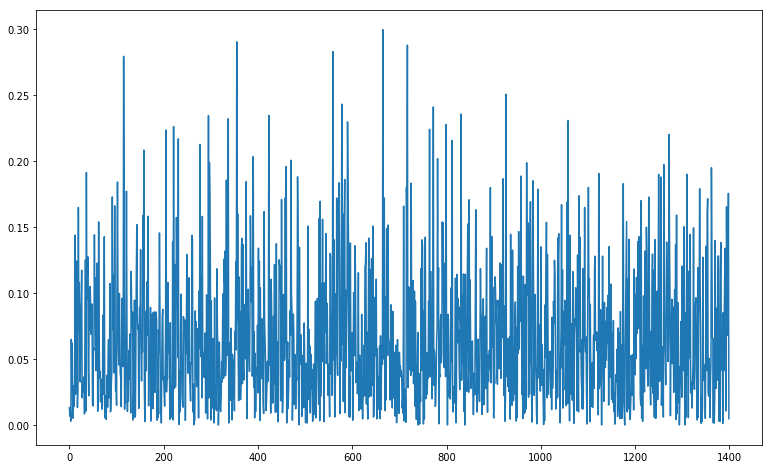

In [26]:
# 人工データの作成
seed=3
Data = tsModel.NeuralNet(p=7, q=0,  N=1400, random_seed=seed, sigma=2, model_random_seed=26, n_unit=[3,3])
# print(tsModel.NeuralNet(p=7, q=1,  N=1400, random_seed=seed, sigma=2, model_random_seed=2, return_net=True).state_dict())
# Data = torch.tensor(Data, dtype=torch.float)
# Data = torch.tensor(Data)
plt.figure(figsize=(13,8))
plt.plot(Data)
plt.savefig(path+"/images/ニューラルネットの人工データその{0}.png".format(seed))

In [27]:
original_window=50
target_window=50
original = Data[:original_window]
dists3 = []

for i in range(original_window, len(Data)-target_window):
    target = Data[i:i+target_window]
    dist, cost_matrix, acc_cost_matrix, _ = dtw(original, target, dist=l2_norm)
    dists3.append(dist)

正規分布＆一様分布
ニューラル


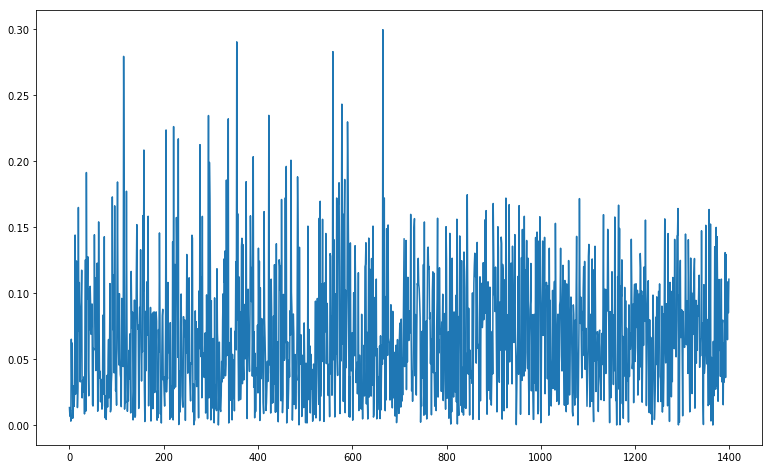

In [28]:
# 人工データの作成
seed=3
Data = tsModel.NeuralNet(p=7, q=0,  N=1400, random_seed=seed, sigma=2, model_random_seed=26, n_unit=[3,3], randomness="normal&uniform")
# print(tsModel.NeuralNet(p=7, q=1,  N=1400, random_seed=seed, sigma=2, model_random_seed=2, return_net=True).state_dict())
# Data = torch.tensor(Data, dtype=torch.float)
# Data = torch.tensor(Data)
plt.figure(figsize=(13,8))
plt.plot(Data)
plt.savefig(path+"/images/正規分布&一様分布でニューラルネットの人工データその{0}.png".format(seed))

In [29]:
original_window=50
target_window=50
original = Data[:original_window]
dists4 = []

for i in range(original_window, len(Data)-target_window):
    target = Data[i:i+target_window]
    dist, cost_matrix, acc_cost_matrix, _ = dtw(original, target, dist=l2_norm)
    dists4.append(dist)

正規分布＆移動ガンマ分布
ニューラル


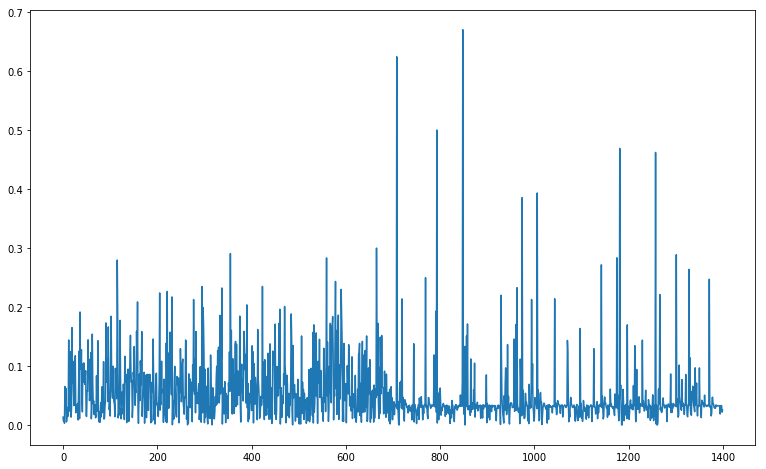

In [30]:
# 人工データの作成
seed=3
Data = tsModel.NeuralNet(p=7, q=0,  N=1400, random_seed=seed, sigma=2, model_random_seed=26, n_unit=[3,3], randomness="normal&gamma")
# print(tsModel.NeuralNet(p=7, q=1,  N=1400, random_seed=seed, sigma=2, model_random_seed=2, return_net=True).state_dict())
# Data = torch.tensor(Data, dtype=torch.float)
# Data = torch.tensor(Data)
plt.figure(figsize=(13,8))
plt.plot(Data)
plt.savefig(path+"/images/正規分布&移動ガンマ分布でニューラルネットの人工データその{0}.png".format(seed))

In [31]:
original_window=50
target_window=50
original = Data[:original_window]
dists5 = []

for i in range(original_window, len(Data)-target_window):
    target = Data[i:i+target_window]
    dist, cost_matrix, acc_cost_matrix, _ = dtw(original, target, dist=l2_norm)
    dists5.append(dist)

In [65]:
fig = plotly.graph_objs.Figure(
    data=[plotly.graph_objs.Scatter(x=list(range(original_window, len(Data)-target_window)), y=dists3, name="変化点なし", yaxis='y'),
#           plotly.graph_objs.Scatter(x=list(range(original_window, len(Data)-target_window)), y=dists4, name="非線形 正規分布から一様分布", yaxis='y'),
          plotly.graph_objs.Scatter(x=list(range(original_window, len(Data)-target_window)), y=dists5, name="非線形 正規分布からガンマ分布", yaxis='y'),
                ], 
    layout=plotly.graph_objs.Layout(title="DTWの変化",
                legend={"x":1, "y":0.1},
                xaxis={"title":"time","range":[1,1400]},
                yaxis={"title":"value"},
                width = 1000,       # 全体のサイズ
                height = 600,
                )
)
plotly.offline.iplot(fig)

正規乱数
正規乱数


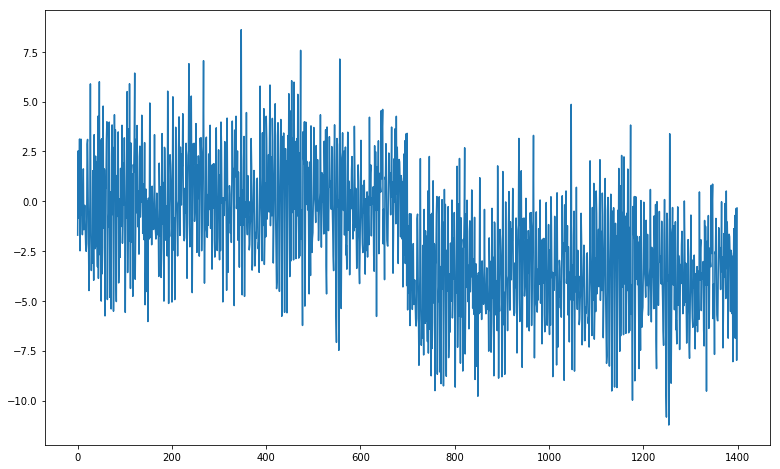

In [66]:
# 人工データの作成
seed=0
Data1 = tsModel.SARIMA(a=[0.3,-0.4,0.2,-0.5,0.6,-0.1,0.1], N=700, random_seed=seed, sigma=2, randomness="normal")
Data2 = tsModel.SARIMA(a=[0.3,-0.4,0.2,-0.5,0.6,-0.1,0.1], N=700, mu=-3, random_seed=seed, sigma=2, randomness="normal")
Data = np.concatenate([Data1, Data2])
# Data = torch.tensor(Data, dtype=torch.float)
# Data = torch.tensor(Data)
plt.figure(figsize=(13,8))
plt.plot(Data)

In [67]:
original_window=50
target_window=50
original = Data[:original_window]
dists6 = []

for i in range(original_window, len(Data)-target_window):
    target = Data[i:i+target_window]
    dist, cost_matrix, acc_cost_matrix, _ = dtw(original, target, dist=l2_norm)
    dists6.append(dist)

In [68]:
fig = plotly.graph_objs.Figure(
    data=[plotly.graph_objs.Scatter(x=list(range(original_window, len(Data)-target_window)), y=Data, name="時系列", yaxis='y'),
          plotly.graph_objs.Scatter(x=list(range(original_window, len(Data)-target_window)), y=dists6, name="平均値の変化", yaxis='y'),
                ], 
    layout=plotly.graph_objs.Layout(title="DTWの変化",
                legend={"x":1, "y":0.1},
                xaxis={"title":"time","range":[1,1400]},
                yaxis={"title":"value"},
                width = 1000,       # 全体のサイズ
                height = 600,
                )
)
plotly.offline.iplot(fig)